# <font style="color:black">Thresholding</font>

Lession objectives:
* Scalar thresholding
* Otsu 
* Adpative threshold

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

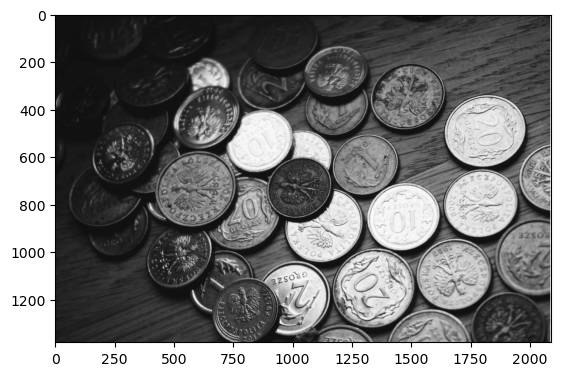

In [5]:
coins_img = cv2.imread(os.path.relpath('../../Data/Coins.png'), cv2.IMREAD_GRAYSCALE)
plt.imshow(coins_img,cmap="gray")

## First let's do a basic thresholding

* BINARY      =  if src(x,y) > thresh, then maxvalue, else 0
* BINARY_INV  =  if src(x,y) > thresh, then 0, else maxvalue
* TRUC        =  if src(x,y) > thresh, then thesh, else src(x,y)
* TOZERO      =  if src(x,y) > thresh, then src(x,y), else 0 
* TOZERO_INV  =  if src(x,y) > thresh, then 0, else src(x,y) 


Text(0.5, 1.0, 'To Zero inverse')

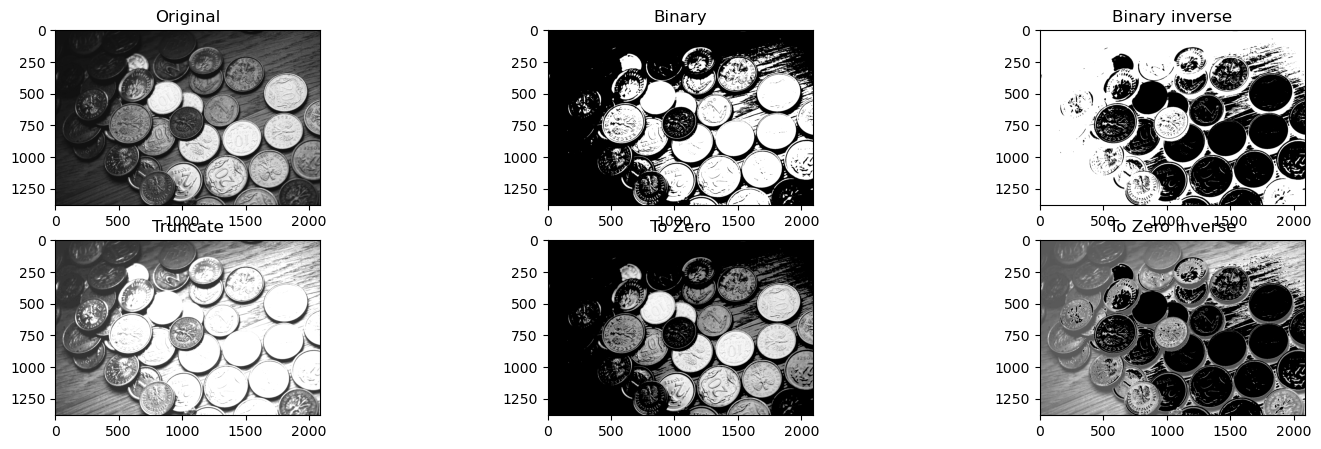

In [20]:
thresh=100
maxvalue=255

# note the threshold function has two outputs.  The first is the th used, the second is the image
th,thresh1_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_BINARY)
th,thresh2_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_BINARY_INV)
th,thresh3_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_TRUNC)
th,thresh4_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_TOZERO)
th,thresh5_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_TOZERO_INV)



# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(231);plt.imshow(coins_img, cmap="gray");  plt.title("Original")
plt.subplot(232);plt.imshow(thresh1_img, cmap="gray");  plt.title("Binary")
plt.subplot(233);plt.imshow(thresh2_img, cmap="gray");  plt.title("Binary inverse")
plt.subplot(234);plt.imshow(thresh3_img, cmap="gray");  plt.title("Truncate")
plt.subplot(235);plt.imshow(thresh4_img, cmap="gray");  plt.title("To Zero")
plt.subplot(236);plt.imshow(thresh5_img, cmap="gray");  plt.title("To Zero inverse")


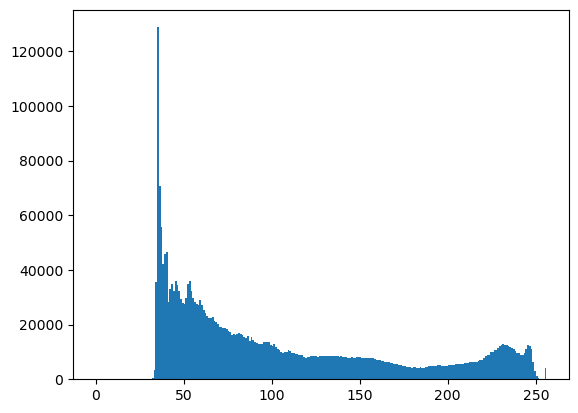

In [19]:
# How did we know which threshhold to use?
plt.hist(coins_img.ravel(),256,[0,256])
plt.show()

# There is no obvious cut point in this histogram

## Otsu's binarization method

The idea is to assume the histogram is made of a bimodal distribution.  Find the cut point that minimizes the in-class variance

Text(0.5, 1.0, 'OTSU with threshold 129.00')

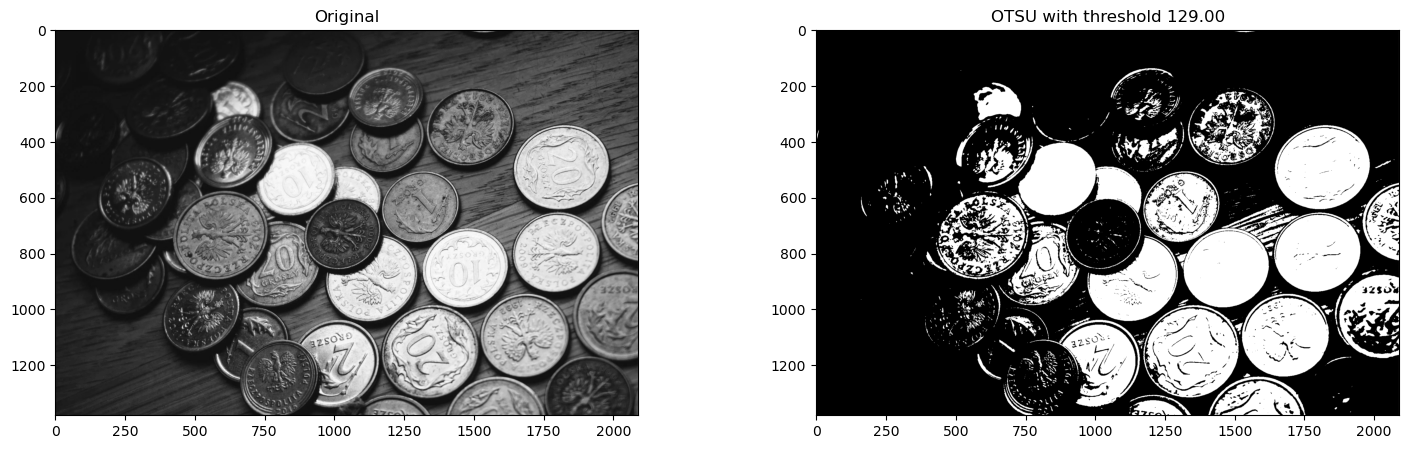

In [26]:
# cv2.THRESH_OTSU finds the threshold instead of using the one provided.  The 5 choices of how to use the threshold still apply

th,thresOtsu_img = cv2.threshold(coins_img,thresh,maxvalue,cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(coins_img, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(thresOtsu_img, cmap="gray");  plt.title(f"OTSU with threshold {th:.2f}")


## Adaptive thresholding

The adaptiveThreshold() function

Inputs: 
* Input Array src
* max value
* adaptive method
* threshold type
* block size
* constant subtracted from the mean of the neighborhood pixels


Text(0.5, 1.0, 'Adaptive Guassian')

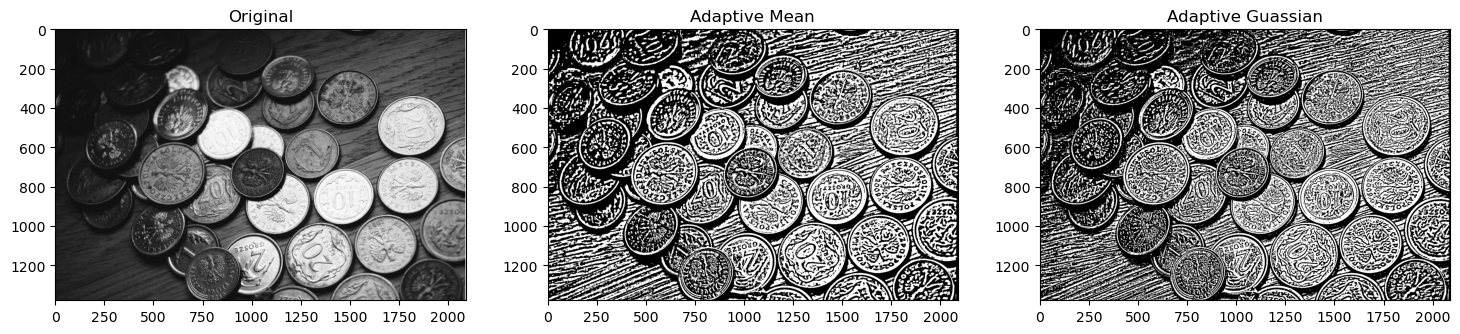

In [41]:

adpt_thresh_img_mean = cv2.adaptiveThreshold(coins_img,maxvalue,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,0)
adpt_thresh_img_gauss = cv2.adaptiveThreshold(coins_img,maxvalue,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,25,0)


plt.figure(figsize=[18, 5])
plt.subplot(131);plt.imshow(coins_img, cmap="gray");  plt.title("Original")
plt.subplot(132);plt.imshow(adpt_thresh_img_mean, cmap="gray");  plt.title("Adaptive Mean")
plt.subplot(133);plt.imshow(adpt_thresh_img_gauss, cmap="gray"); plt.title("Adaptive Guassian")